In [49]:
# @title
!pip install easydict
!pip install torchtuples

import os
import time
import torch
import torchtuples as tt
import numpy as np
import easydict
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import StratifiedKFold


In [50]:
#repair zw
"""!pip install scikit-learn

!pip install sklearn_pandas
!pip install -U scikit-learn"""

from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import StratifiedKFold


In [51]:
import os
import time
import torch
import torchtuples as tt
import numpy as np
import easydict
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import StratifiedKFold

## Data Preprocessing

In [52]:
"""from google.colab import files
uploaded = files.upload()"""

'from google.colab import files\nuploaded = files.upload()'

In [53]:
df = pd.read_csv('/content/processdata.csv', encoding='latin-1')
data = df

In [54]:
date_columns = ['Date.of.Last.Contact', 'Date.of.Diagnostic']
data[date_columns] = data[date_columns].apply(pd.to_datetime, errors='coerce')
has_na = data[date_columns].isna().any(axis=1)

if has_na.any():
#     max_last_contact_date = data['Date.of.Last.Contact'].max()
#     data['Survival_Time'] = (max_last_contact_date - data['Date.of.Diagnostic']).dt.days
    data['Survival_Time'] = (data['Date.of.Last.Contact'] - data['Date.of.Diagnostic']).dt.days
else:
    data['Survival_Time'] = (data['Date.of.Last.Contact'] - data['Date.of.Diagnostic']).dt.days

In [55]:
data['indicater'] = np.where(data['Date.of.Death'].isna(), 0, 1)
columns_to_drop = ['Date.of.Death', 'Date.of.Last.Contact', 'Date.of.Diagnostic']


data.drop(columns=columns_to_drop, inplace=True)

In [56]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, MinMaxScaler


columns_to_one_hot = ['RCBP.Name', 'Raca.Color', 'State.Civil', 'Code.Profession', 'Name.Occupation', 'Status.Address',
                      'City.Address', 'Description.of.Topography', 'Topography.Code', 'Morphology.Description',
                      'Code.of.Morphology', 'Description.of.Disease', 'Illness.Code', 'Diagnostic.means', 'Extension',
                      'Type.of.Death']

for column in columns_to_one_hot:
    top_9_values = data[column].value_counts().nlargest(9).index
    data[column] = data[column].where(data[column].isin(top_9_values), 'other')

data = pd.get_dummies(data, columns=columns_to_one_hot)

columns_to_binarize = ['Gender', 'Indicator.of.Rare.Case']

lb = LabelBinarizer()
for column in columns_to_binarize:
    data[column] = lb.fit_transform(data[column])

scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])


print(data.head())


   Gender       Age  Indicator.of.Rare.Case  Survival_Time  indicater  \
0       1  0.283019                       0              0          1   
1       1  0.490566                       0              0          1   
2       1  0.698113                       0              0          1   
3       1  0.556604                       0              0          1   
4       0  0.122642                       0           3959          0   

   RCBP.Name_RCBP BELO HORIZONTE  RCBP.Name_RCBP CAMPINAS-UNICAMP  \
0                          False                             True   
1                          False                             True   
2                          False                             True   
3                          False                             True   
4                          False                             True   

   RCBP.Name_RCBP DISTRITO FEDERAL  RCBP.Name_RCBP DRS BARRETOS  \
0                            False                        False   
1           

In [57]:
data.head()

,Gender,Age,Indicator.of.Rare.Case,Survival_Time,indicater,RCBP.Name_RCBP BELO HORIZONTE,RCBP.Name_RCBP CAMPINAS-UNICAMP,RCBP.Name_RCBP DISTRITO FEDERAL,RCBP.Name_RCBP DRS BARRETOS,RCBP.Name_RCBP FORTALEZA,...,Diagnostic.means_PESQUISA,Diagnostic.means_SDO,Diagnostic.means_other,Extension_IN SITU,Extension_LOCALIZADO,Extension_MET?STASE,Extension_N?O SE APLICA,Type.of.Death_C?NCER,Type.of.Death_N?O C?NCER,Type.of.Death_other
0,1,0.283019,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
1,1,0.490566,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,1,0.698113,0,0,1,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
3,1,0.556604,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
4,0,0.122642,0,3959,0,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [58]:
print(list(data.columns))

['Gender', 'Age', 'Indicator.of.Rare.Case', 'Survival_Time', 'indicater', 'RCBP.Name_RCBP BELO HORIZONTE', 'RCBP.Name_RCBP CAMPINAS-UNICAMP', 'RCBP.Name_RCBP DISTRITO FEDERAL', 'RCBP.Name_RCBP DRS BARRETOS', 'RCBP.Name_RCBP FORTALEZA', 'RCBP.Name_RCBP MANAUS', 'RCBP.Name_RCBP MATO GROSSO (INTERIOR)', 'RCBP.Name_RCBP NATAL', 'RCBP.Name_RCBP PORTO ALEGRE', 'RCBP.Name_other', 'Raca.Color_AMARELA', 'Raca.Color_BRANCO', 'Raca.Color_IND?GENA', 'Raca.Color_PARDA', 'Raca.Color_PRETA', 'Raca.Color_other', 'State.Civil_CASADO', 'State.Civil_SEPARADO JUDICIALMENTE', 'State.Civil_SOLTEIRO', 'State.Civil_UNI?O CONSENSUAL', 'State.Civil_VI?VO', 'State.Civil_other', 'Code.Profession_0.0', 'Code.Profession_111.0', 'Code.Profession_141.0', 'Code.Profession_512.0', 'Code.Profession_514.0', 'Code.Profession_516.0', 'Code.Profession_622.0', 'Code.Profession_715.0', 'Code.Profession_782.0', 'Code.Profession_other', 'Name.Occupation_CONDUTORES DE VE?CULOS E OPERADORES DE EQUIPAMENTOS DE ELEVA??O E DE MOVIME

In [59]:
# change the batch size from 1024 to 3222 to improve the performance
# created by Xinyu modified by Jingyan
args = easydict.EasyDict({
    "batch_size": 2048,
    "cuda": True, # should set it to be true when using gpu, otherwise data would be on two devices
    "lr": 0.05,
    "seed": 1111,
    "reduce_rate": 0.95,
    "epochs": 200,
    "clip": 5.0,
    "log_interval":10,
})

In [60]:
def cycle(iterable):
    while True:
        for x in iterable:
            yield x

In [61]:
device = torch.device("cuda" if args.cuda else "cpu")
dtype = torch.FloatTensor
if torch.cuda.is_available() and args.cuda:
    dtype = torch.cuda.FloatTensor

np.random.seed(1234)
_ = torch.manual_seed(123)

In [62]:
print(device)

cuda


In [63]:
from sklearn import preprocessing

In [64]:
data[data['indicater']==1]

,Gender,Age,Indicator.of.Rare.Case,Survival_Time,indicater,RCBP.Name_RCBP BELO HORIZONTE,RCBP.Name_RCBP CAMPINAS-UNICAMP,RCBP.Name_RCBP DISTRITO FEDERAL,RCBP.Name_RCBP DRS BARRETOS,RCBP.Name_RCBP FORTALEZA,...,Diagnostic.means_PESQUISA,Diagnostic.means_SDO,Diagnostic.means_other,Extension_IN SITU,Extension_LOCALIZADO,Extension_MET?STASE,Extension_N?O SE APLICA,Type.of.Death_C?NCER,Type.of.Death_N?O C?NCER,Type.of.Death_other
0,1,0.283019,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
1,1,0.490566,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,1,0.698113,0,0,1,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
3,1,0.556604,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
5,0,0.754717,0,0,1,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14750,0,0.613208,0,1475,1,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
14751,1,0.528302,0,1302,1,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
14752,1,0.122642,0,936,1,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
14753,1,0.773585,0,420,1,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [65]:
X = data.drop(['Survival_Time', 'indicater'], axis=1)
time_all = data['Survival_Time'].values
event_all = data['indicater'].values

In [66]:
# X_normalize
X.head(5)

,Gender,Age,Indicator.of.Rare.Case,RCBP.Name_RCBP BELO HORIZONTE,RCBP.Name_RCBP CAMPINAS-UNICAMP,RCBP.Name_RCBP DISTRITO FEDERAL,RCBP.Name_RCBP DRS BARRETOS,RCBP.Name_RCBP FORTALEZA,RCBP.Name_RCBP MANAUS,RCBP.Name_RCBP MATO GROSSO (INTERIOR),...,Diagnostic.means_PESQUISA,Diagnostic.means_SDO,Diagnostic.means_other,Extension_IN SITU,Extension_LOCALIZADO,Extension_MET?STASE,Extension_N?O SE APLICA,Type.of.Death_C?NCER,Type.of.Death_N?O C?NCER,Type.of.Death_other
0,1,0.283019,0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
1,1,0.490566,0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,1,0.698113,0,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,True,False,False
3,1,0.556604,0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
4,0,0.122642,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [67]:
max_time = data['Survival_Time'].max()
max_time

7408

In [68]:
print(list(X.columns))

['Gender', 'Age', 'Indicator.of.Rare.Case', 'RCBP.Name_RCBP BELO HORIZONTE', 'RCBP.Name_RCBP CAMPINAS-UNICAMP', 'RCBP.Name_RCBP DISTRITO FEDERAL', 'RCBP.Name_RCBP DRS BARRETOS', 'RCBP.Name_RCBP FORTALEZA', 'RCBP.Name_RCBP MANAUS', 'RCBP.Name_RCBP MATO GROSSO (INTERIOR)', 'RCBP.Name_RCBP NATAL', 'RCBP.Name_RCBP PORTO ALEGRE', 'RCBP.Name_other', 'Raca.Color_AMARELA', 'Raca.Color_BRANCO', 'Raca.Color_IND?GENA', 'Raca.Color_PARDA', 'Raca.Color_PRETA', 'Raca.Color_other', 'State.Civil_CASADO', 'State.Civil_SEPARADO JUDICIALMENTE', 'State.Civil_SOLTEIRO', 'State.Civil_UNI?O CONSENSUAL', 'State.Civil_VI?VO', 'State.Civil_other', 'Code.Profession_0.0', 'Code.Profession_111.0', 'Code.Profession_141.0', 'Code.Profession_512.0', 'Code.Profession_514.0', 'Code.Profession_516.0', 'Code.Profession_622.0', 'Code.Profession_715.0', 'Code.Profession_782.0', 'Code.Profession_other', 'Name.Occupation_CONDUTORES DE VE?CULOS E OPERADORES DE EQUIPAMENTOS DE ELEVA??O E DE MOVIMENTA??O DE CARGAS   \t', 'Name.

In [69]:
check = pd.DataFrame(columns=['Gender', 'Age', 'Indicator.of.Rare.Case', 'Survival_Time', 'indicater', 'RCBP.Name_RCBP BELO HORIZONTE', 'RCBP.Name_RCBP CAMPINAS-UNICAMP', 'RCBP.Name_RCBP DISTRITO FEDERAL', 'RCBP.Name_RCBP DRS BARRETOS', 'RCBP.Name_RCBP FORTALEZA', 'RCBP.Name_RCBP MANAUS', 'RCBP.Name_RCBP MATO GROSSO (INTERIOR)', 'RCBP.Name_RCBP NATAL', 'RCBP.Name_RCBP PORTO ALEGRE', 'RCBP.Name_other', 'Raca.Color_AMARELA', 'Raca.Color_BRANCO', 'Raca.Color_IND?GENA', 'Raca.Color_PARDA', 'Raca.Color_PRETA', 'Raca.Color_other', 'State.Civil_CASADO', 'State.Civil_SEPARADO JUDICIALMENTE', 'State.Civil_SOLTEIRO', 'State.Civil_UNI?O CONSENSUAL', 'State.Civil_VI?VO', 'State.Civil_other', 'Code.Profession_0.0', 'Code.Profession_111.0', 'Code.Profession_141.0', 'Code.Profession_512.0', 'Code.Profession_514.0', 'Code.Profession_516.0', 'Code.Profession_622.0', 'Code.Profession_715.0', 'Code.Profession_782.0', 'Code.Profession_other', 'Name.Occupation_CONDUTORES DE VE?CULOS E OPERADORES DE EQUIPAMENTOS DE ELEVA??O E DE MOVIMENTA??O DE CARGAS   \t', 'Name.Occupation_GERENTES DE PRODU??O E OPERA??ES  \t', 'Name.Occupation_MEMBROS SUPERIORES DO PODER LEGISLATIVO, EXECUTIVO E JUDICI?RIO   \t', 'Name.Occupation_SEM INFORMA??O\t', 'Name.Occupation_TRABALHADORES AGR?COLAS   \t', 'Name.Occupation_TRABALHADORES DA CONSTRU??O CIVIL E OBRAS P?BLICAS\t', 'Name.Occupation_TRABALHADORES DOS SERVI?OS DOM?STICOS EM GERAL\t', 'Name.Occupation_TRABALHADORES NOS SERVI?OS DE ADMINISTRA??O, CONSERVA??O E MANUTEN??O DE EDIF?CIOS E LOGRADOUROS  \t', 'Name.Occupation_TRABALHADORES NOS SERVI?OS DE EMBELEZAMENTO E CUIDADOS PESSOAIS   \t', 'Name.Occupation_other', 'Status.Address_AMAZONAS', 'Status.Address_CEAR?', 'Status.Address_DISTRITO FEDERAL', 'Status.Address_MATO GROSSO ', 'Status.Address_MINAS GERAIS', 'Status.Address_RIO DE JANEIRO', 'Status.Address_RIO GRANDE DO NORTE', 'Status.Address_RIO GRANDE DO SUL', 'Status.Address_S?O PAULO', 'Status.Address_other', 'City.Address_BARRETOS', 'City.Address_BEBEDOURO', 'City.Address_BRAS?LIA', 'City.Address_CAMPINAS', 'City.Address_COLINA', 'City.Address_GUA?RA', 'City.Address_MONTE AZUL PAULISTA', 'City.Address_OL?MPIA', 'City.Address_VIRADOURO', 'City.Address_other', 'Description.of.Topography_COLO DO UTERO, SOE', 'Description.of.Topography_ESTOMAGO, SOE', 'Description.of.Topography_LOCALIZACAO PRIMARIA DESCONHECIDA, SOE', 'Description.of.Topography_MAMA , SOE', 'Description.of.Topography_MEDULA OSSEA', 'Description.of.Topography_PELE DE OUTRAS PARTES DA FACE', 'Description.of.Topography_PELE DO MEMBRO SUPERIOR E DO OMBRO', 'Description.of.Topography_PROSTATA, SOE', 'Description.of.Topography_PULMAO, SOE', 'Description.of.Topography_other', 'Topography.Code_C169', 'Topography.Code_C349', 'Topography.Code_C421', 'Topography.Code_C443', 'Topography.Code_C446', 'Topography.Code_C509', 'Topography.Code_C539', 'Topography.Code_C619', 'Topography.Code_C809', 'Topography.Code_other', 'Morphology.Description_ADENOCARCINOMA TUBULAR', 'Morphology.Description_ADENOCARCINOMA, SOE', 'Morphology.Description_CARCINOMA BASO CELULAR, SOE', 'Morphology.Description_CARCINOMA BASOCELULAR, SOE', 'Morphology.Description_CARCINOMA DE CELULAS ESCAMOSAS, SOE', 'Morphology.Description_CARCINOMA DUCTAL INFILTRANTE', 'Morphology.Description_CARCINOMA ESCAMOCELULAR, SOE', 'Morphology.Description_NEOPLASIA MALIGNA', 'Morphology.Description_NEOPLASMA MALIGNO', 'Morphology.Description_other', 'Code.of.Morphology_80003', 'Code.of.Morphology_80703', 'Code.of.Morphology_80903', 'Code.of.Morphology_81403', 'Code.of.Morphology_82113', 'Code.of.Morphology_85003', 'Code.of.Morphology_95903', 'Code.of.Morphology_97323', 'Code.of.Morphology_98613', 'Code.of.Morphology_other', 'Description.of.Disease_BRONQUIOS OU PULMOES, SOE', 'Description.of.Disease_COLO DO UTERO, SOE', 'Description.of.Disease_ESTOMAGO, SOE', 'Description.of.Disease_LOCALIZACAO PRIMARIA DESCONHECIDA', 'Description.of.Disease_MAMA , SOE', 'Description.of.Disease_PELE DE OUTRAS PARTES DA FACE', 'Description.of.Disease_PELE DO MEMBRO SUPERIOR E DO OMBRO', 'Description.of.Disease_PELE DO TRONCO', 'Description.of.Disease_PROSTATA', 'Description.of.Disease_other', 'Illness.Code_C169', 'Illness.Code_C349', 'Illness.Code_C443', 'Illness.Code_C445', 'Illness.Code_C446', 'Illness.Code_C509', 'Illness.Code_C61', 'Illness.Code_C80', 'Illness.Code_C859', 'Illness.Code_other', 'Diagnostic.means_CITOLOGIA', 'Diagnostic.means_CL?NICO', 'Diagnostic.means_HISTOLOGIA DO TUMOR PRIM?RIO', 'Diagnostic.means_PESQUISA', 'Diagnostic.means_SDO', 'Diagnostic.means_other', 'Extension_IN SITU', 'Extension_LOCALIZADO', 'Extension_MET?STASE', 'Extension_N?O SE APLICA', 'Type.of.Death_C?NCER', 'Type.of.Death_N?O C?NCER', 'Type.of.Death_other'])

columns = list(check.columns)
for i, c in enumerate(columns):
    if 'extension' in c.lower():
        print(f"{c} - {i}")

for i, c in enumerate(columns):
    if 'illness.code' in c.lower():
        print(f"{c} - {i}")

Extension_IN SITU - 133
Extension_LOCALIZADO - 134
Extension_MET?STASE - 135
Extension_N?O SE APLICA - 136
Illness.Code_C169 - 117
Illness.Code_C349 - 118
Illness.Code_C443 - 119
Illness.Code_C445 - 120
Illness.Code_C446 - 121
Illness.Code_C509 - 122
Illness.Code_C61 - 123
Illness.Code_C80 - 124
Illness.Code_C859 - 125
Illness.Code_other - 126


Data divided into MTL form

In [70]:
import numpy as np

# Take the maximum time and divide it into any number of intervals
Tmax = 7500
num_intervals = 7

intervals = [(i * (Tmax // num_intervals), (i + 1) * (Tmax // num_intervals)) for i in range(num_intervals)]

Y = np.zeros((len(time_all), num_intervals), dtype=np.int_)

for i, time_val in enumerate(time_all):
    for j, (left, right) in enumerate(intervals):
        if time_val > right or (left < time_val <= right):
            Y[i, j] = 1

Y = torch.Tensor(Y)

print(Y.shape)

torch.Size([14755, 7])


In [71]:
Y

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]])

In [72]:
# Creat mask matrix
W = np.zeros((len(time_all), num_intervals), dtype=np.int_)

for i, (time_val, event_val) in enumerate(zip(time_all, event_all)):
    for j, (left, right) in enumerate(intervals):
        if event_val == 0 and time_val < left:
            W[i, j] = 0
        else:
            W[i, j] = 1

W = torch.Tensor(W)

In [73]:
print(W.shape)
# So far all the codes are done by Xinyu

torch.Size([14755, 7])


## Define and Apply the DataLoader
- Introduced the dataloader to deal with the dataset, which would be helpful in the training and testing steps

In [74]:
# Jingyan adds the dataloader
from torch.utils.data import Dataset, DataLoader, random_split

class MultiTaskDataset(Dataset):
    def __init__(self, data, targets, masks, event_all):
        self.data = data
        self.targets = targets
        self.masks = masks
        self.event_all = event_all

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], [self.targets[i][idx] for i in range(len(self.targets))], [self.masks[i][idx] for i in range(len(self.masks))], self.event_all[idx]


In [75]:
for col in X.columns:       # modified by Ali Sam. (when I try to run the code, the transformation to tensor gives an error of data type, so I have converted the boolean coloumns to int dtype first)
    if X[col].dtype == bool:
        X[col] = X[col].astype(int)
X_use = torch.tensor(X.values, dtype=torch.float32)
X_use.shape

torch.Size([14755, 138])

In [76]:
Y_transform = [Y[:, i:i+1] for i in range(Y.size(1))]
print(Y_transform[0].shape)
W_transform = [W[:, i:i+1] for i in range(W.size(1))]
print(W_transform[0].shape)

torch.Size([14755, 1])
torch.Size([14755, 1])


In [77]:
#Xinyu
full_dataset = MultiTaskDataset(X_use, Y_transform, W_transform, event_all)

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=args.batch_size, shuffle=True, drop_last=True)

In [78]:
# created by Jingyan to check the data shape before training
for x, y, w, e in train_loader:
    print(x.shape)
    print(len(y), y[0].shape)
    print(len(w), w[0].shape)
    print(e.shape)
    in_features = x.shape[1]
    out_features = len(y)
    break

torch.Size([2048, 138])
7 torch.Size([2048, 1])
7 torch.Size([2048, 1])
torch.Size([2048])


In [79]:
out_features

7

In [80]:
for x, y, w, e in test_loader:
    print(x.shape)
    print(len(y), y[0].shape)
    print(len(w), w[0].shape)
    print(e.shape)
    break

torch.Size([2048, 138])
7 torch.Size([2048, 1])
7 torch.Size([2048, 1])
torch.Size([2048])


In [81]:
e_train = []
for x, y, w, e in train_loader:
  e_train.append(e)

event_train = torch.cat(e_train, dim=0)

In [82]:
event_train

tensor([1, 0, 1,  ..., 1, 1, 0])

In [83]:
event_train.shape

torch.Size([10240])

## Original Code (comment out)

In [84]:
# num_columns = Y_train.shape[1]
# Y_train_cols = []
# for i in range(num_columns):
#     col = Y_train[:, i]
#     var_name = 'Y' + str(i+1)
#     locals()[var_name] = col
#     Y_train_cols.append(locals()[var_name])

# num_test_columns = Y_test.shape[1]
# Y_test_cols = []
# for i in range(num_test_columns):
#     col = Y_test[:, i]
#     var_name = 'Y' + str(i+1)
#     locals()[var_name] = col
#     Y_test_cols.append(locals()[var_name])

In [85]:
# num_columns = W_train.shape[1]

# W_train_cols = []

# for i in range(num_columns):
#   col = W_train[:, i]
#   var_name = 'W' + str(i+1)
#   locals()[var_name] = col
#   W_train_cols.append(locals()[var_name])

# num_test_columns = W_test.shape[1]

# W_test_cols = []

# for i in range(num_test_columns):
#   col = W_test[:, i]
#   var_name = 'W' + str(i+1)
#   locals()[var_name] = col
#   W_test_cols.append(locals()[var_name])

In [86]:
# print(W_train_cols[1].shape)
# print(W_test_cols[1].shape)
# print(Y_train_cols[1].shape)
# print(Y_test_cols[1].shape)

## Model
- Changed the loss function to match the data format using dataloader

In [87]:
import torch.nn as nn
import torch.nn.functional as F

In [88]:
"""# Made by Xinyu and modified by Dr.Li and Jingyan
class MultiTaskModel(nn.Module):
    def __init__(self, in_features, out_features):
        super(MultiTaskModel, self).__init__()
        self.num_tasks = out_features
        self.input_features = in_features

        self.shared_layers = nn.Sequential(
            nn.Linear(in_features, 128),
            nn.ReLU(),
            nn.AlphaDropout(0.1),

            nn.Linear(128, 128),
            nn.ReLU(),
            nn.AlphaDropout(0.1),

            nn.Linear(128, 128),
            nn.ReLU(),
            nn.AlphaDropout(0.1)
        )
# A Classic Multi Task Learning Framework
        self.task_layers = nn.ModuleList([nn.Linear(128, 1) for _ in range(out_features)])#after your papaer I decided to use MTL to solve this prob

# This forward propagation logic defines the chain propagation of our idea
    def forward(self, x):
        shared_output = self.shared_layers(x)
        task_outputs = []
        for i, task_layer in enumerate(self.task_layers):
            if i == 0:
                task_output = torch.sigmoid(task_layer(shared_output))
            else:
                task_output = torch.sigmoid(task_layer(shared_output)) * task_outputs[-1]
            task_outputs.append(task_output)

        return task_outputs# Here I difined the S(x)


    # def custom_loss(self, task_outputs, Y_train_cols, W_train_cols):
    #     loss = 0
    #     for i, task_output in enumerate(task_outputs):
    #         task_target = Y_train_cols[i].unsqueeze(1)
    #         task_mask = W_train_cols[i].unsqueeze(1)
    #         task_loss = F.binary_cross_entropy_with_logits(task_output, task_target.float(), reduction='none')
    #         task_loss = task_loss * task_mask.float()
    #         loss += task_loss.sum() / task_mask.sum()
    #     return loss#There are how I use mask matrix W to control the loss function

# Modified by Jingyan
    def custom_loss(self, task_outputs, targets, masks):
        loss = 0
        for i, task_output in enumerate(task_outputs):
            task_target = targets[i]
            task_mask = masks[i]
            task_loss = F.binary_cross_entropy(task_output, task_target.float(), reduction='none')
            task_loss = task_loss * task_mask.float()
            loss += task_loss.sum() / task_mask.sum()
        return loss"""

"# Made by Xinyu and modified by Dr.Li and Jingyan\nclass MultiTaskModel(nn.Module):\n    def __init__(self, in_features, out_features):\n        super(MultiTaskModel, self).__init__()\n        self.num_tasks = out_features\n        self.input_features = in_features\n\n        self.shared_layers = nn.Sequential(\n            nn.Linear(in_features, 128),\n            nn.ReLU(),\n            nn.AlphaDropout(0.1),\n\n            nn.Linear(128, 128),\n            nn.ReLU(),\n            nn.AlphaDropout(0.1),\n\n            nn.Linear(128, 128),\n            nn.ReLU(),\n            nn.AlphaDropout(0.1)\n        )\n# A Classic Multi Task Learning Framework\n        self.task_layers = nn.ModuleList([nn.Linear(128, 1) for _ in range(out_features)])#after your papaer I decided to use MTL to solve this prob\n\n# This forward propagation logic defines the chain propagation of our idea\n    def forward(self, x):\n        shared_output = self.shared_layers(x)\n        task_outputs = []\n        for 

# Typo fixed

In [89]:
"""#Zw
from tqdm import tqdm
import torch
import sys
#sys.path.append('/content/attributionpriors/attributionpriors')
sys.path.append('/kaggle/working/attributionpriors/attributionpriors')
from pytorch_ops import AttributionPriorExplainer
class MultiTaskModel(nn.Module):
  def __init__(self,in_features,out_features):
    super(MultiTaskModel,self).__init__()
    self.num_tasks=out_features
    self.input_features=in_features
    self.shared_layers=nn.Sequential(
        nn.Linear(in_features,128),
        nn.ReLU(),
        nn.AlphaDropout(0.1),

        nn.Linear(128,128),
        nn.ReLU(),
        nn.AlphaDropout(0.1),

        nn.Linear(128,128),
        nn.ReLU(),
        nn.AlphaDropout(0.1)
    )

    self.task_layers=nn.ModuleList([nn.Linear(128,1) for _ in range(out_features)])

  def forward(self,x):
    shared_output=self.shared_layers(x)
    task_outputs=[]
    for i,task_layer in enumerate(self.task_layers):
      if i==0:
        task_output=torch.sigmoid(task_layer(shared_output))
      else:
        task_output=torch.sigmoid(task_layer(shared_output))*task_outputs[-1]
      task_outputs.append(task_output)
    return task_outputs

  def custom_loss(self,task_outputs,targets,maskes):
    loss=0
    for i,task_output in enumerate(task_outputs):
      task_target=targets[i]
      task_mask=masks[i]
      task_loss=F.binary_cross_entropy(task_output,task_target.float(),reduction='none')
      task_loss=task_loss*task_mask.float()
      loss+=task_loss.sum()/task_mask.sum()

    return loss"""

"#Zw\nfrom tqdm import tqdm\nimport torch\nimport sys\n#sys.path.append('/content/attributionpriors/attributionpriors')\nsys.path.append('/kaggle/working/attributionpriors/attributionpriors')\nfrom pytorch_ops import AttributionPriorExplainer\nclass MultiTaskModel(nn.Module):\n  def __init__(self,in_features,out_features):\n    super(MultiTaskModel,self).__init__()\n    self.num_tasks=out_features\n    self.input_features=in_features\n    self.shared_layers=nn.Sequential(\n        nn.Linear(in_features,128),\n        nn.ReLU(),\n        nn.AlphaDropout(0.1),\n\n        nn.Linear(128,128),\n        nn.ReLU(),\n        nn.AlphaDropout(0.1),\n\n        nn.Linear(128,128),\n        nn.ReLU(),\n        nn.AlphaDropout(0.1)\n    )\n\n    self.task_layers=nn.ModuleList([nn.Linear(128,1) for _ in range(out_features)])\n\n  def forward(self,x):\n    shared_output=self.shared_layers(x)\n    task_outputs=[]\n    for i,task_layer in enumerate(self.task_layers):\n      if i==0:\n        task_output

## TASK 2

In [90]:
!git clone https://github.com/suinleelab/attributionpriors.git

fatal: destination path 'attributionpriors' already exists and is not an empty directory.


In [91]:
#Zw
from tqdm import tqdm
import torch
import sys
sys.path.append('/content/attributionpriors/attributionpriors')
#sys.path.append('/kaggle/working/attributionpriors/attributionpriors')
from pytorch_ops import AttributionPriorExplainer
class MultiTaskModel(nn.Module):
  def __init__(self,in_features,out_features):
    super(MultiTaskModel,self).__init__()
    self.num_tasks=out_features
    self.input_features=in_features
    self.shared_layers=nn.Sequential(
        nn.Linear(in_features,128),
        nn.ReLU(),
        nn.AlphaDropout(0.1),

        nn.Linear(128,128),
        nn.ReLU(),
        nn.AlphaDropout(0.1),

        nn.Linear(128,128),
        nn.ReLU(),
        nn.AlphaDropout(0.1)
    )

    self.task_layers=nn.ModuleList([nn.Linear(128,1) for _ in range(out_features)])

  def forward(self,x):
    shared_output=self.shared_layers(x)
    task_outputs=[]
    for i,task_layer in enumerate(self.task_layers):
      if i==0:
        task_output=torch.sigmoid(task_layer(shared_output))
      else:
        task_output=torch.sigmoid(task_layer(shared_output))*task_outputs[-1]
      task_outputs.append(task_output)
    return task_outputs

  def custom_loss(self,task_outputs,targets,maskes):
    loss=0
    for i,task_output in enumerate(task_outputs):
      task_target=targets[i]
      task_mask=masks[i]
      task_loss=F.binary_cross_entropy(task_output,task_target.float(),reduction='none')
      task_loss=task_loss*task_mask.float()
      loss+=task_loss.sum()/task_mask.sum()

    return loss

##Task 2 Training

In [92]:
'''#zw
Am=AttributionPriorExplainer(train_dataset,args.batch_size)
model=MultiTaskModel(in_features,out_features).to(device)
model.train()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

loss_2=[]
epoches=150
for epoch in range(epoches):
  total_loss=0
  progress=tqdm(enumerate(train_loader),total=len(train_loader),desc=f"Epoch {epoch+1}/{epoches}")
  for batch,(x_train,targets,masks,event_train) in progress:
    x_train=x_train.to(device).float()
    targets=[target.to(device).float() for target in targets]
    masks=[mask.to(device).float() for mask in masks]
    optimizer.zero_grad()
    task = model(x_train)
    expected_g = Am.shap_values(model,x_train)
    print(torch.all(expected_g==0))
    interested=expected_g[:,[1, 133, 134, 135, 136, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]]
    non_interested=expected_g[:,[i for i in range(expected_g.shape[1]) if i not in [1,133,134, 135, 136, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]]]

    t_regress=0
    for i in range(expected_g.shape[1]):
      t_regress=t_regress+torch.norm(expected_g[:,i],p=2)
    avg_reg=t_regress/expected_g.shape[1]

    t_in_regress=0
    for i in range(interested.shape[1]):
      in_regress=torch.norm(interested[:,i],p=2)
      t_in_regress=F.relu(avg_reg-in_regress)

    t_notin_regress=0
    for i in range(not_interested.shape[1]):
      t_notin_regress+=torch.norm(not_interested[:,i],p=2)

    l1=2.2
    l2=0.2
    loss=model.custom_loss(task,targets,masks)+l1*t_in_regress+l2*t_notin_regress
    loss.backward()
    optimizer.step()
    total_loss+=loss.item()
    progress.set_postfix({'Loss':loss.item()})

  avgloss=total_loss/len(train_loader)
  loss_2.append(avgloss)
  print(f"Eng of Epoch {epoch+1},average loss:{avgloss:.4f}")
print("Task complete")'''

'#zw\nAm=AttributionPriorExplainer(train_dataset,args.batch_size)\nmodel=MultiTaskModel(in_features,out_features).to(device)\nmodel.train()\noptimizer=torch.optim.Adam(model.parameters(),lr=0.001)\n\nloss_2=[]\nepoches=150\nfor epoch in range(epoches):\n  total_loss=0\n  progress=tqdm(enumerate(train_loader),total=len(train_loader),desc=f"Epoch {epoch+1}/{epoches}")\n  for batch,(x_train,targets,masks,event_train) in progress:\n    x_train=x_train.to(device).float()\n    targets=[target.to(device).float() for target in targets]\n    masks=[mask.to(device).float() for mask in masks]\n    optimizer.zero_grad()\n    task = model(x_train)\n    expected_g = Am.shap_values(model,x_train)\n    print(torch.all(expected_g==0))\n    interested=expected_g[:,[1, 133, 134, 135, 136, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]]\n    non_interested=expected_g[:,[i for i in range(expected_g.shape[1]) if i not in [1,133,134, 135, 136, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]]]\n\n    t_r

In [93]:
# Import the attribution package by Jingyan
# Please use the package I modified
# I modified the '/content/attributionpriors/attributionpriors/pytorch_ops.py' file
# to accomodate for multitask learning usecase
# You can see the modifications in the github if interested
!git clone https://github.com/jingyanjiang/attributionpriors_multitask.git
!pip install ./attributionpriors_multitask

# This github is important, you may look into this to modify CF

fatal: destination path 'attributionpriors_multitask' already exists and is not an empty directory.
Processing ./attributionpriors_multitask
  Preparing metadata (setup.py) ... done
  Created wheel for attributionpriors: filename=attributionpriors-0.1.3-py3-none-any.whl size=20494 sha256=7b760a5e79a078e71652ae1768ef6ebc7ab22e2c0a7a41e2968855976f7b911d
  Stored in directory: /tmp/pip-ephem-wheel-cache-w916hbqu/wheels/d0/73/65/94649507c3566b074ff62820c51c5bf621ee86db106e8ee876
Successfully built attributionpriors
  Attempting uninstall: attributionpriors
    Found existing installation: attributionpriors 0.1.3
    Uninstalling attributionpriors-0.1.3:
      Successfully uninstalled attributionpriors-0.1.3


# Testing

In [95]:
# Debugging code to inspect the first batch
first_batch = next(iter(train_loader))
print("Batch structure:", type(first_batch))
print("Number of items in the batch:", len(first_batch))
print("Contents of the batch:", [type(item) for item in first_batch])

Batch structure: <class 'list'>
Number of items in the batch: 4
Contents of the batch: [<class 'torch.Tensor'>, <class 'list'>, <class 'list'>, <class 'torch.Tensor'>]


In [96]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import sys
import torch.cuda as cuda

# Ensure your attributionpriors library and necessary modules are correctly installed and configured
sys.path.append('/kaggle/working/attributionpriors/attributionpriors')
from attributionpriors.pytorch_ops import AttributionPriorExplainer

class MultiTaskModel(nn.Module):
    def __init__(self, in_features, out_features):
        super(MultiTaskModel, self).__init__()
        self.num_tasks = out_features
        self.input_features = in_features
        self.shared_layers = nn.Sequential(
            nn.Linear(in_features, 128),
            nn.ReLU(),
            nn.AlphaDropout(0.1),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.AlphaDropout(0.1),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.AlphaDropout(0.1)
        )
        self.task_layers = nn.ModuleList([nn.Linear(128, 1) for _ in range(out_features)])


    def forward(self, x):
        shared_output = self.shared_layers(x)
        task_outputs = []
        for i, task_layer in enumerate(self.task_layers):
            if i == 0:
                task_output = torch.sigmoid(task_layer(shared_output))
            else:
                task_output = torch.sigmoid(task_layer(shared_output)) * task_outputs[-1]
            task_outputs.append(task_output)
        return task_outputs

    def custom_loss(self, task_outputs, targets, masks, attributions, lambda_smooth):
        loss = 0
        for i, task_output in enumerate(task_outputs):
            task_target = targets[i]
            task_mask = masks[i]
            task_loss = F.binary_cross_entropy(task_output, task_target.float(), reduction='none')
            task_loss = task_loss * task_mask.float()
            loss += task_loss.sum() / task_mask.sum()

        # Temporal smoothness regularization
        smoothness_cost = 0
        for i in range(len(attributions) - 1):
            smoothness_cost += torch.norm(attributions[i + 1] - attributions[i], p=1)
        loss += lambda_smooth * smoothness_cost

        return loss



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiTaskModel(in_features, out_features).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 150
loss_records = []

# Setup AttributionPriorExplainer
APExp = AttributionPriorExplainer(train_dataset, args.batch_size, k=1)

for epoch in range(num_epochs):
    total_loss = 0
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch + 1}/{num_epochs}")
    for batch_idx, (X_train, targets, masks,event_train) in progress_bar:
        X_train = X_train.to(device)
        targets = [target.to(device) for target in targets]
        masks = [mask.to(device) for mask in masks]

        optimizer.zero_grad()
        task_outputs_ = model(X_train)

        # Calculate attributions
        expected_gradients = APExp.shap_values(model, X_train)

        loss = model.custom_loss(task_outputs_, targets, masks, expected_gradients, lambda_smooth=0.001)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        progress_bar.set_postfix({'Loss': loss.item()})

    avg_loss = total_loss / len(train_loader)
    loss_records.append(avg_loss)
    print(f'End of Epoch {epoch + 1}, Average Loss: {avg_loss:.4f}')

print('Training completed')


Epoch 1/150:   0%|          | 0/5 [00:00<?, ?it/s]


AttributeError: 'list' object has no attribute 'size'

## Training
- Rewrote the training part

In [50]:
# Jingyan's attribution
import torch.cuda as cuda
from attributionpriors.pytorch_ops import AttributionPriorExplainer
from tqdm import tqdm

APExp = AttributionPriorExplainer(train_dataset, args.batch_size, k=1)

model = MultiTaskModel(in_features, out_features).to(device)
model = model.to(device)
model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# During loss training, please carefully observe
# where the gradient integral is calculated,
# and then find the corresponding source code.
# In the logic of the source code, replace the baseline with CF

loss_records = []
num_epochs = 150
for epoch in range(num_epochs):
    total_loss = 0
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch + 1}/{num_epochs}")

    for batch_idx, (X_train, targets, masks, event_train) in progress_bar:
        X_train = X_train.to(device)
        targets = [target.to(device) for target in targets]
        masks = [mask.to(device) for mask in masks]


        optimizer.zero_grad()
        task_outputs_ = model(X_train)
        expected_gradients = APExp.shap_values(model, X_train)
        print(torch.all(expected_gradients == 0))

        interested = expected_gradients[:, [1, 133, 134, 135, 136, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]]
        not_interested = expected_gradients[:, [i for i in range(expected_gradients.shape[1]) if i not in [1, 133, 134, 135, 136, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]]]


        # All features
        # p=2 means using the L2 norm
        total_reg = 0
        for i in range(expected_gradients.shape[1]):
            total_reg += torch.norm(expected_gradients[:, i], p=2)
        avg_total_reg = total_reg/expected_gradients.shape[1]

        # Features that we are interested
        total_in_reg = 0
        for i in range(interested.shape[1]):
            in_reg = torch.norm(interested[:, i], p=2)
            total_in_reg += F.relu(avg_total_reg - in_reg)

        # Features that we are not interested
        total_notin_reg = 0
        for i in range(not_interested.shape[1]):
            total_notin_reg += torch.norm(not_interested[:, i], p=2)

        # weights that could be adjusted
        lambda1 = 2
        lambda2 = 0.1

        loss = loss = model.custom_loss(task_outputs_, targets, masks, expected_gradients, lambda_smooth=0.1) + lambda1  + lambda2
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        progress_bar.set_postfix({'Loss': loss.item()})

    avg_loss = total_loss / len(train_loader)
    loss_records.append(avg_loss)
    print(f'End of Epoch {epoch + 1}, Average Loss: {avg_loss:.4f}')

print('Training completed')


Epoch 1/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 1/150:  20%|██        | 1/5 [00:00<00:02,  1.70it/s, Loss=6.86]

tensor(False, device='cuda:0')


Epoch 1/150:  40%|████      | 2/5 [00:01<00:02,  1.47it/s, Loss=6.94]

tensor(False, device='cuda:0')


Epoch 1/150:  60%|██████    | 3/5 [00:02<00:01,  1.38it/s, Loss=6.69]

tensor(False, device='cuda:0')


Epoch 1/150:  80%|████████  | 4/5 [00:02<00:00,  1.49it/s, Loss=6.47]

tensor(False, device='cuda:0')


Epoch 1/150: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s, Loss=6.58]


End of Epoch 1, Average Loss: 6.7066


Epoch 2/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 2/150:  20%|██        | 1/5 [00:00<00:02,  1.34it/s, Loss=6.43]

tensor(False, device='cuda:0')


Epoch 2/150:  40%|████      | 2/5 [00:01<00:01,  1.56it/s, Loss=6.37]

tensor(False, device='cuda:0')


Epoch 2/150:  60%|██████    | 3/5 [00:02<00:01,  1.46it/s, Loss=6.29]

tensor(False, device='cuda:0')


Epoch 2/150:  80%|████████  | 4/5 [00:02<00:00,  1.55it/s, Loss=6.37]

tensor(False, device='cuda:0')


Epoch 2/150: 100%|██████████| 5/5 [00:03<00:00,  1.49it/s, Loss=6.31]


End of Epoch 2, Average Loss: 6.3530


Epoch 3/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 3/150:  20%|██        | 1/5 [00:00<00:02,  1.37it/s, Loss=6.31]

tensor(False, device='cuda:0')


Epoch 3/150:  40%|████      | 2/5 [00:01<00:01,  1.54it/s, Loss=6.12]

tensor(False, device='cuda:0')


Epoch 3/150:  60%|██████    | 3/5 [00:02<00:01,  1.46it/s, Loss=6.13]

tensor(False, device='cuda:0')


Epoch 3/150:  80%|████████  | 4/5 [00:02<00:00,  1.32it/s, Loss=6.12]

tensor(False, device='cuda:0')


Epoch 3/150: 100%|██████████| 5/5 [00:03<00:00,  1.31it/s, Loss=6.08]


End of Epoch 3, Average Loss: 6.1517


Epoch 4/150:   0%|          | 0/5 [00:00<?, ?it/s]Exception ignored in: <function _xla_gc_callback at 0x7831031bd900>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


tensor(False, device='cuda:0')


Epoch 4/150:  20%|██        | 1/5 [00:00<00:03,  1.06it/s, Loss=5.97]

tensor(False, device='cuda:0')


Epoch 4/150:  40%|████      | 2/5 [00:01<00:02,  1.21it/s, Loss=6.17]

tensor(False, device='cuda:0')


Epoch 4/150:  60%|██████    | 3/5 [00:02<00:01,  1.38it/s, Loss=5.91]

tensor(False, device='cuda:0')


Epoch 4/150:  80%|████████  | 4/5 [00:03<00:00,  1.38it/s, Loss=5.95]

tensor(False, device='cuda:0')


Epoch 4/150: 100%|██████████| 5/5 [00:03<00:00,  1.33it/s, Loss=6]


End of Epoch 4, Average Loss: 5.9997


Epoch 5/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 5/150:  20%|██        | 1/5 [00:00<00:02,  1.76it/s, Loss=5.99]

tensor(False, device='cuda:0')


Epoch 5/150:  40%|████      | 2/5 [00:01<00:01,  1.50it/s, Loss=5.92]

tensor(False, device='cuda:0')


Epoch 5/150:  60%|██████    | 3/5 [00:02<00:01,  1.45it/s, Loss=5.82]

tensor(False, device='cuda:0')


Epoch 5/150:  80%|████████  | 4/5 [00:02<00:00,  1.55it/s, Loss=5.88]

tensor(False, device='cuda:0')


Epoch 5/150: 100%|██████████| 5/5 [00:03<00:00,  1.50it/s, Loss=5.8]


End of Epoch 5, Average Loss: 5.8842


Epoch 6/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 6/150:  20%|██        | 1/5 [00:00<00:02,  1.35it/s, Loss=5.89]

tensor(False, device='cuda:0')


Epoch 6/150:  40%|████      | 2/5 [00:01<00:01,  1.57it/s, Loss=5.8]

tensor(False, device='cuda:0')


Epoch 6/150:  60%|██████    | 3/5 [00:02<00:01,  1.46it/s, Loss=5.71]

tensor(False, device='cuda:0')


Epoch 6/150:  80%|████████  | 4/5 [00:02<00:00,  1.42it/s, Loss=5.76]

tensor(False, device='cuda:0')


Epoch 6/150: 100%|██████████| 5/5 [00:03<00:00,  1.48it/s, Loss=5.81]


End of Epoch 6, Average Loss: 5.7917


Epoch 7/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 7/150:  20%|██        | 1/5 [00:01<00:04,  1.00s/it, Loss=5.81]

tensor(False, device='cuda:0')


Epoch 7/150:  40%|████      | 2/5 [00:01<00:02,  1.03it/s, Loss=5.86]

tensor(False, device='cuda:0')


Epoch 7/150:  60%|██████    | 3/5 [00:02<00:01,  1.16it/s, Loss=5.69]

tensor(False, device='cuda:0')


Epoch 7/150:  80%|████████  | 4/5 [00:03<00:00,  1.22it/s, Loss=5.78]

tensor(False, device='cuda:0')


Epoch 7/150: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s, Loss=5.68]


End of Epoch 7, Average Loss: 5.7634


Epoch 8/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 8/150:  20%|██        | 1/5 [00:00<00:02,  1.35it/s, Loss=5.76]

tensor(False, device='cuda:0')


Epoch 8/150:  40%|████      | 2/5 [00:01<00:02,  1.37it/s, Loss=5.62]

tensor(False, device='cuda:0')


Epoch 8/150:  60%|██████    | 3/5 [00:02<00:01,  1.50it/s, Loss=5.62]

tensor(False, device='cuda:0')


Epoch 8/150:  80%|████████  | 4/5 [00:02<00:00,  1.44it/s, Loss=5.7]

tensor(False, device='cuda:0')


Epoch 8/150: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s, Loss=5.66]


End of Epoch 8, Average Loss: 5.6722


Epoch 9/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 9/150:  20%|██        | 1/5 [00:00<00:02,  1.76it/s, Loss=5.6]

tensor(False, device='cuda:0')


Epoch 9/150:  40%|████      | 2/5 [00:01<00:01,  1.50it/s, Loss=5.82]

tensor(False, device='cuda:0')


Epoch 9/150:  60%|██████    | 3/5 [00:02<00:01,  1.44it/s, Loss=5.68]

tensor(False, device='cuda:0')


Epoch 9/150:  80%|████████  | 4/5 [00:02<00:00,  1.55it/s, Loss=5.57]

tensor(False, device='cuda:0')


Epoch 9/150: 100%|██████████| 5/5 [00:03<00:00,  1.50it/s, Loss=5.55]


End of Epoch 9, Average Loss: 5.6449


Epoch 10/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 10/150:  20%|██        | 1/5 [00:00<00:03,  1.30it/s, Loss=5.56]

tensor(False, device='cuda:0')


Epoch 10/150:  40%|████      | 2/5 [00:01<00:02,  1.32it/s, Loss=5.68]

tensor(False, device='cuda:0')


Epoch 10/150:  60%|██████    | 3/5 [00:02<00:01,  1.09it/s, Loss=5.62]

tensor(False, device='cuda:0')


Epoch 10/150:  80%|████████  | 4/5 [00:03<00:00,  1.13it/s, Loss=5.62]

tensor(False, device='cuda:0')


Epoch 10/150: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s, Loss=5.55]


End of Epoch 10, Average Loss: 5.6045


Epoch 11/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 11/150:  20%|██        | 1/5 [00:00<00:03,  1.29it/s, Loss=5.62]

tensor(False, device='cuda:0')


Epoch 11/150:  40%|████      | 2/5 [00:01<00:02,  1.33it/s, Loss=5.58]

tensor(False, device='cuda:0')


Epoch 11/150:  60%|██████    | 3/5 [00:02<00:01,  1.47it/s, Loss=5.61]

tensor(False, device='cuda:0')


Epoch 11/150:  80%|████████  | 4/5 [00:02<00:00,  1.41it/s, Loss=5.61]

tensor(False, device='cuda:0')


Epoch 11/150: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s, Loss=5.54]


End of Epoch 11, Average Loss: 5.5939


Epoch 12/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 12/150:  20%|██        | 1/5 [00:00<00:02,  1.36it/s, Loss=5.63]

tensor(False, device='cuda:0')


Epoch 12/150:  40%|████      | 2/5 [00:01<00:02,  1.36it/s, Loss=5.51]

tensor(False, device='cuda:0')


Epoch 12/150:  60%|██████    | 3/5 [00:02<00:01,  1.35it/s, Loss=5.52]

tensor(False, device='cuda:0')


Epoch 12/150:  80%|████████  | 4/5 [00:02<00:00,  1.47it/s, Loss=5.39]

tensor(False, device='cuda:0')


Epoch 12/150: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s, Loss=5.61]


End of Epoch 12, Average Loss: 5.5330


Epoch 13/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 13/150:  20%|██        | 1/5 [00:00<00:02,  1.39it/s, Loss=5.55]

tensor(False, device='cuda:0')


Epoch 13/150:  40%|████      | 2/5 [00:01<00:01,  1.56it/s, Loss=5.51]

tensor(False, device='cuda:0')


Epoch 13/150:  60%|██████    | 3/5 [00:02<00:01,  1.33it/s, Loss=5.48]

tensor(False, device='cuda:0')


Epoch 13/150:  80%|████████  | 4/5 [00:03<00:00,  1.24it/s, Loss=5.45]

tensor(False, device='cuda:0')


Epoch 13/150: 100%|██████████| 5/5 [00:04<00:00,  1.25it/s, Loss=5.46]


End of Epoch 13, Average Loss: 5.4908


Epoch 14/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 14/150:  20%|██        | 1/5 [00:00<00:03,  1.04it/s, Loss=5.45]

tensor(False, device='cuda:0')


Epoch 14/150:  40%|████      | 2/5 [00:01<00:02,  1.24it/s, Loss=5.47]

tensor(False, device='cuda:0')


Epoch 14/150:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s, Loss=5.49]

tensor(False, device='cuda:0')


Epoch 14/150:  80%|████████  | 4/5 [00:03<00:00,  1.32it/s, Loss=5.47]

tensor(False, device='cuda:0')


Epoch 14/150: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s, Loss=5.4]


End of Epoch 14, Average Loss: 5.4548


Epoch 15/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 15/150:  20%|██        | 1/5 [00:00<00:02,  1.35it/s, Loss=5.48]

tensor(False, device='cuda:0')


Epoch 15/150:  40%|████      | 2/5 [00:01<00:02,  1.36it/s, Loss=5.48]

tensor(False, device='cuda:0')


Epoch 15/150:  60%|██████    | 3/5 [00:02<00:01,  1.51it/s, Loss=5.32]

tensor(False, device='cuda:0')


Epoch 15/150:  80%|████████  | 4/5 [00:02<00:00,  1.45it/s, Loss=5.32]

tensor(False, device='cuda:0')


Epoch 15/150: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s, Loss=5.46]


End of Epoch 15, Average Loss: 5.4115


Epoch 16/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 16/150:  20%|██        | 1/5 [00:00<00:02,  1.36it/s, Loss=5.27]

tensor(False, device='cuda:0')


Epoch 16/150:  40%|████      | 2/5 [00:01<00:01,  1.53it/s, Loss=5.44]

tensor(False, device='cuda:0')


Epoch 16/150:  60%|██████    | 3/5 [00:02<00:01,  1.45it/s, Loss=5.3]

tensor(False, device='cuda:0')


Epoch 16/150:  80%|████████  | 4/5 [00:03<00:00,  1.25it/s, Loss=5.41]

tensor(False, device='cuda:0')


Epoch 16/150: 100%|██████████| 5/5 [00:03<00:00,  1.27it/s, Loss=5.41]


End of Epoch 16, Average Loss: 5.3629


Epoch 17/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 17/150:  20%|██        | 1/5 [00:00<00:03,  1.18it/s, Loss=5.36]

tensor(False, device='cuda:0')


Epoch 17/150:  40%|████      | 2/5 [00:01<00:02,  1.26it/s, Loss=5.27]

tensor(False, device='cuda:0')


Epoch 17/150:  60%|██████    | 3/5 [00:02<00:01,  1.45it/s, Loss=5.34]

tensor(False, device='cuda:0')


Epoch 17/150:  80%|████████  | 4/5 [00:02<00:00,  1.39it/s, Loss=5.38]

tensor(False, device='cuda:0')


Epoch 17/150: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s, Loss=5.36]


End of Epoch 17, Average Loss: 5.3400


Epoch 18/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 18/150:  20%|██        | 1/5 [00:00<00:02,  1.36it/s, Loss=5.21]

tensor(False, device='cuda:0')


Epoch 18/150:  40%|████      | 2/5 [00:01<00:02,  1.33it/s, Loss=5.34]

tensor(False, device='cuda:0')


Epoch 18/150:  60%|██████    | 3/5 [00:02<00:01,  1.33it/s, Loss=5.26]

tensor(False, device='cuda:0')


Epoch 18/150:  80%|████████  | 4/5 [00:02<00:00,  1.45it/s, Loss=5.3]

tensor(False, device='cuda:0')


Epoch 18/150: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s, Loss=5.27]


End of Epoch 18, Average Loss: 5.2781


Epoch 19/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 19/150:  20%|██        | 1/5 [00:00<00:02,  1.35it/s, Loss=5.21]

tensor(False, device='cuda:0')


Epoch 19/150:  40%|████      | 2/5 [00:01<00:01,  1.55it/s, Loss=5.32]

tensor(False, device='cuda:0')


Epoch 19/150:  60%|██████    | 3/5 [00:02<00:01,  1.46it/s, Loss=5.32]

tensor(False, device='cuda:0')


Epoch 19/150:  80%|████████  | 4/5 [00:02<00:00,  1.55it/s, Loss=5.2]

tensor(False, device='cuda:0')


Epoch 19/150: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s, Loss=5.24]


End of Epoch 19, Average Loss: 5.2561


Epoch 20/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 20/150:  20%|██        | 1/5 [00:01<00:04,  1.09s/it, Loss=5.29]

tensor(False, device='cuda:0')


Epoch 20/150:  40%|████      | 2/5 [00:01<00:02,  1.11it/s, Loss=5.24]

tensor(False, device='cuda:0')


Epoch 20/150:  60%|██████    | 3/5 [00:02<00:01,  1.18it/s, Loss=5.26]

tensor(False, device='cuda:0')


Epoch 20/150:  80%|████████  | 4/5 [00:03<00:00,  1.23it/s, Loss=5.26]

tensor(False, device='cuda:0')


Epoch 20/150: 100%|██████████| 5/5 [00:04<00:00,  1.20it/s, Loss=5.16]


End of Epoch 20, Average Loss: 5.2440


Epoch 21/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 21/150:  20%|██        | 1/5 [00:01<00:04,  1.11s/it, Loss=5.22]

tensor(False, device='cuda:0')


Epoch 21/150:  40%|████      | 2/5 [00:02<00:02,  1.01it/s, Loss=5.28]

tensor(False, device='cuda:0')


Epoch 21/150:  60%|██████    | 3/5 [00:02<00:01,  1.24it/s, Loss=5.19]

tensor(False, device='cuda:0')


Epoch 21/150:  80%|████████  | 4/5 [00:03<00:00,  1.28it/s, Loss=5.22]

tensor(False, device='cuda:0')


Epoch 21/150: 100%|██████████| 5/5 [00:04<00:00,  1.21it/s, Loss=5.19]


End of Epoch 21, Average Loss: 5.2199


Epoch 22/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 22/150:  20%|██        | 1/5 [00:00<00:02,  1.68it/s, Loss=5.2]

tensor(False, device='cuda:0')


Epoch 22/150:  40%|████      | 2/5 [00:01<00:02,  1.49it/s, Loss=5.19]

tensor(False, device='cuda:0')


Epoch 22/150:  60%|██████    | 3/5 [00:02<00:01,  1.42it/s, Loss=5.25]

tensor(False, device='cuda:0')


Epoch 22/150:  80%|████████  | 4/5 [00:02<00:00,  1.51it/s, Loss=5.14]

tensor(False, device='cuda:0')


Epoch 22/150: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s, Loss=5.22]


End of Epoch 22, Average Loss: 5.2001


Epoch 23/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 23/150:  20%|██        | 1/5 [00:00<00:03,  1.14it/s, Loss=5.2]

tensor(False, device='cuda:0')


Epoch 23/150:  40%|████      | 2/5 [00:01<00:02,  1.10it/s, Loss=5.18]

tensor(False, device='cuda:0')


Epoch 23/150:  60%|██████    | 3/5 [00:02<00:01,  1.20it/s, Loss=5.13]

tensor(False, device='cuda:0')


Epoch 23/150:  80%|████████  | 4/5 [00:03<00:00,  1.36it/s, Loss=5.23]

tensor(False, device='cuda:0')


Epoch 23/150: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s, Loss=5.14]


End of Epoch 23, Average Loss: 5.1754


Epoch 24/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 24/150:  20%|██        | 1/5 [00:00<00:02,  1.37it/s, Loss=5.17]

tensor(False, device='cuda:0')


Epoch 24/150:  40%|████      | 2/5 [00:01<00:01,  1.56it/s, Loss=5.27]

tensor(False, device='cuda:0')


Epoch 24/150:  60%|██████    | 3/5 [00:02<00:01,  1.47it/s, Loss=5.15]

tensor(False, device='cuda:0')


Epoch 24/150:  80%|████████  | 4/5 [00:02<00:00,  1.41it/s, Loss=5.14]

tensor(False, device='cuda:0')


Epoch 24/150: 100%|██████████| 5/5 [00:03<00:00,  1.48it/s, Loss=5.13]


End of Epoch 24, Average Loss: 5.1726


Epoch 25/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 25/150:  20%|██        | 1/5 [00:00<00:02,  1.37it/s, Loss=5.16]

tensor(False, device='cuda:0')


Epoch 25/150:  40%|████      | 2/5 [00:01<00:02,  1.38it/s, Loss=5.18]

tensor(False, device='cuda:0')


Epoch 25/150:  60%|██████    | 3/5 [00:02<00:01,  1.52it/s, Loss=5.11]

tensor(False, device='cuda:0')


Epoch 25/150:  80%|████████  | 4/5 [00:02<00:00,  1.45it/s, Loss=5.23]

tensor(False, device='cuda:0')


Epoch 25/150: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s, Loss=5.17]


End of Epoch 25, Average Loss: 5.1689


Epoch 26/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 26/150:  20%|██        | 1/5 [00:00<00:02,  1.70it/s, Loss=5.11]

tensor(False, device='cuda:0')


Epoch 26/150:  40%|████      | 2/5 [00:01<00:02,  1.17it/s, Loss=5.21]

tensor(False, device='cuda:0')


Epoch 26/150:  60%|██████    | 3/5 [00:02<00:01,  1.05it/s, Loss=5.17]

tensor(False, device='cuda:0')


Epoch 26/150:  80%|████████  | 4/5 [00:03<00:00,  1.23it/s, Loss=5.19]

tensor(False, device='cuda:0')


Epoch 26/150: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s, Loss=5.18]


End of Epoch 26, Average Loss: 5.1716


Epoch 27/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 27/150:  20%|██        | 1/5 [00:00<00:02,  1.36it/s, Loss=5.12]

tensor(False, device='cuda:0')


Epoch 27/150:  40%|████      | 2/5 [00:01<00:02,  1.35it/s, Loss=5.21]

tensor(False, device='cuda:0')


Epoch 27/150:  60%|██████    | 3/5 [00:02<00:01,  1.50it/s, Loss=5.09]

tensor(False, device='cuda:0')


Epoch 27/150:  80%|████████  | 4/5 [00:02<00:00,  1.45it/s, Loss=5.17]

tensor(False, device='cuda:0')


Epoch 27/150: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s, Loss=5.19]


End of Epoch 27, Average Loss: 5.1579


Epoch 28/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 28/150:  20%|██        | 1/5 [00:00<00:02,  1.69it/s, Loss=5.23]

tensor(False, device='cuda:0')


Epoch 28/150:  40%|████      | 2/5 [00:01<00:02,  1.48it/s, Loss=5.11]

tensor(False, device='cuda:0')


Epoch 28/150:  60%|██████    | 3/5 [00:01<00:01,  1.56it/s, Loss=5.09]

tensor(False, device='cuda:0')


Epoch 28/150:  80%|████████  | 4/5 [00:02<00:00,  1.47it/s, Loss=5.2]

tensor(False, device='cuda:0')


Epoch 28/150: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s, Loss=5.13]


End of Epoch 28, Average Loss: 5.1509


Epoch 29/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 29/150:  20%|██        | 1/5 [00:00<00:02,  1.69it/s, Loss=5.16]

tensor(False, device='cuda:0')


Epoch 29/150:  40%|████      | 2/5 [00:01<00:02,  1.45it/s, Loss=5.11]

tensor(False, device='cuda:0')


Epoch 29/150:  60%|██████    | 3/5 [00:02<00:01,  1.21it/s, Loss=5.17]

tensor(False, device='cuda:0')


Epoch 29/150:  80%|████████  | 4/5 [00:03<00:00,  1.14it/s, Loss=5.16]

tensor(False, device='cuda:0')


Epoch 29/150: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s, Loss=5.15]


End of Epoch 29, Average Loss: 5.1505


Epoch 30/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 30/150:  20%|██        | 1/5 [00:00<00:02,  1.34it/s, Loss=5.2]

tensor(False, device='cuda:0')


Epoch 30/150:  40%|████      | 2/5 [00:01<00:01,  1.53it/s, Loss=5.16]

tensor(False, device='cuda:0')


Epoch 30/150:  60%|██████    | 3/5 [00:02<00:01,  1.45it/s, Loss=5.15]

tensor(False, device='cuda:0')


Epoch 30/150:  80%|████████  | 4/5 [00:02<00:00,  1.55it/s, Loss=5.18]

tensor(False, device='cuda:0')


Epoch 30/150: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s, Loss=5.08]


End of Epoch 30, Average Loss: 5.1531


Epoch 31/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 31/150:  20%|██        | 1/5 [00:00<00:02,  1.38it/s, Loss=5.05]

tensor(False, device='cuda:0')


Epoch 31/150:  40%|████      | 2/5 [00:01<00:01,  1.54it/s, Loss=5.18]

tensor(False, device='cuda:0')


Epoch 31/150:  60%|██████    | 3/5 [00:02<00:01,  1.44it/s, Loss=5.14]

tensor(False, device='cuda:0')


Epoch 31/150:  80%|████████  | 4/5 [00:02<00:00,  1.41it/s, Loss=5.19]

tensor(False, device='cuda:0')


Epoch 31/150: 100%|██████████| 5/5 [00:03<00:00,  1.48it/s, Loss=5.21]


End of Epoch 31, Average Loss: 5.1548


Epoch 32/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 32/150:  20%|██        | 1/5 [00:00<00:02,  1.34it/s, Loss=5.1]

tensor(False, device='cuda:0')


Epoch 32/150:  40%|████      | 2/5 [00:01<00:02,  1.34it/s, Loss=5.15]

tensor(False, device='cuda:0')


Epoch 32/150:  60%|██████    | 3/5 [00:02<00:01,  1.49it/s, Loss=5.28]

tensor(False, device='cuda:0')


Epoch 32/150:  80%|████████  | 4/5 [00:02<00:00,  1.30it/s, Loss=5.14]

tensor(False, device='cuda:0')


Epoch 32/150: 100%|██████████| 5/5 [00:04<00:00,  1.20it/s, Loss=5.12]


End of Epoch 32, Average Loss: 5.1586


Epoch 33/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 33/150:  20%|██        | 1/5 [00:01<00:04,  1.00s/it, Loss=5.13]

tensor(False, device='cuda:0')


Epoch 33/150:  40%|████      | 2/5 [00:01<00:02,  1.18it/s, Loss=5.16]

tensor(False, device='cuda:0')


Epoch 33/150:  60%|██████    | 3/5 [00:02<00:01,  1.37it/s, Loss=5.2]

tensor(False, device='cuda:0')


Epoch 33/150:  80%|████████  | 4/5 [00:03<00:00,  1.37it/s, Loss=5.11]

tensor(False, device='cuda:0')


Epoch 33/150: 100%|██████████| 5/5 [00:03<00:00,  1.31it/s, Loss=5.16]


End of Epoch 33, Average Loss: 5.1537


Epoch 34/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 34/150:  20%|██        | 1/5 [00:00<00:02,  1.71it/s, Loss=5.18]

tensor(False, device='cuda:0')


Epoch 34/150:  40%|████      | 2/5 [00:01<00:02,  1.48it/s, Loss=5.17]

tensor(False, device='cuda:0')


Epoch 34/150:  60%|██████    | 3/5 [00:02<00:01,  1.42it/s, Loss=5.17]

tensor(False, device='cuda:0')


Epoch 34/150:  80%|████████  | 4/5 [00:02<00:00,  1.53it/s, Loss=5.15]

tensor(False, device='cuda:0')


Epoch 34/150: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s, Loss=5.14]


End of Epoch 34, Average Loss: 5.1626


Epoch 35/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 35/150:  20%|██        | 1/5 [00:00<00:02,  1.71it/s, Loss=5.2]

tensor(False, device='cuda:0')


Epoch 35/150:  40%|████      | 2/5 [00:01<00:02,  1.41it/s, Loss=5.04]

tensor(False, device='cuda:0')


Epoch 35/150:  60%|██████    | 3/5 [00:02<00:01,  1.36it/s, Loss=5.11]

tensor(False, device='cuda:0')


Epoch 35/150:  80%|████████  | 4/5 [00:02<00:00,  1.48it/s, Loss=5.17]

tensor(False, device='cuda:0')


Epoch 35/150: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s, Loss=5.2]


End of Epoch 35, Average Loss: 5.1450


Epoch 36/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 36/150:  20%|██        | 1/5 [00:01<00:04,  1.02s/it, Loss=5.14]

tensor(False, device='cuda:0')


Epoch 36/150:  40%|████      | 2/5 [00:01<00:02,  1.06it/s, Loss=5.19]

tensor(False, device='cuda:0')


Epoch 36/150:  60%|██████    | 3/5 [00:02<00:01,  1.17it/s, Loss=5.14]

tensor(False, device='cuda:0')


Epoch 36/150:  80%|████████  | 4/5 [00:03<00:00,  1.23it/s, Loss=5.13]

tensor(False, device='cuda:0')


Epoch 36/150: 100%|██████████| 5/5 [00:03<00:00,  1.25it/s, Loss=5.15]


End of Epoch 36, Average Loss: 5.1493


Epoch 37/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 37/150:  20%|██        | 1/5 [00:00<00:03,  1.29it/s, Loss=5.18]

tensor(False, device='cuda:0')


Epoch 37/150:  40%|████      | 2/5 [00:01<00:02,  1.30it/s, Loss=5.13]

tensor(False, device='cuda:0')


Epoch 37/150:  60%|██████    | 3/5 [00:02<00:01,  1.45it/s, Loss=5.18]

tensor(False, device='cuda:0')


Epoch 37/150:  80%|████████  | 4/5 [00:02<00:00,  1.40it/s, Loss=5.13]

tensor(False, device='cuda:0')


Epoch 37/150: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s, Loss=5.14]


End of Epoch 37, Average Loss: 5.1501


Epoch 38/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 38/150:  20%|██        | 1/5 [00:00<00:02,  1.70it/s, Loss=5.04]

tensor(False, device='cuda:0')


Epoch 38/150:  40%|████      | 2/5 [00:01<00:02,  1.48it/s, Loss=5.13]

tensor(False, device='cuda:0')


Epoch 38/150:  60%|██████    | 3/5 [00:01<00:01,  1.56it/s, Loss=5.13]

tensor(False, device='cuda:0')


Epoch 38/150:  80%|████████  | 4/5 [00:02<00:00,  1.47it/s, Loss=5.18]

tensor(False, device='cuda:0')


Epoch 38/150: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s, Loss=5.21]


End of Epoch 38, Average Loss: 5.1398


Epoch 39/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 39/150:  20%|██        | 1/5 [00:00<00:02,  1.69it/s, Loss=5.1]

tensor(False, device='cuda:0')


Epoch 39/150:  40%|████      | 2/5 [00:01<00:02,  1.21it/s, Loss=5.08]

tensor(False, device='cuda:0')


Epoch 39/150:  60%|██████    | 3/5 [00:02<00:01,  1.06it/s, Loss=5.19]

tensor(False, device='cuda:0')


Epoch 39/150:  80%|████████  | 4/5 [00:03<00:00,  1.25it/s, Loss=5.23]

tensor(False, device='cuda:0')


Epoch 39/150: 100%|██████████| 5/5 [00:04<00:00,  1.25it/s, Loss=5.16]


End of Epoch 39, Average Loss: 5.1519


Epoch 40/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 40/150:  20%|██        | 1/5 [00:00<00:02,  1.64it/s, Loss=5.13]

tensor(False, device='cuda:0')


Epoch 40/150:  40%|████      | 2/5 [00:01<00:02,  1.48it/s, Loss=5.16]

tensor(False, device='cuda:0')


Epoch 40/150:  60%|██████    | 3/5 [00:02<00:01,  1.42it/s, Loss=5.22]

tensor(False, device='cuda:0')


Epoch 40/150:  80%|████████  | 4/5 [00:02<00:00,  1.38it/s, Loss=5.07]

tensor(False, device='cuda:0')


Epoch 40/150: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s, Loss=5.17]


End of Epoch 40, Average Loss: 5.1519


Epoch 41/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 41/150:  20%|██        | 1/5 [00:00<00:02,  1.37it/s, Loss=5.19]

tensor(False, device='cuda:0')


Epoch 41/150:  40%|████      | 2/5 [00:01<00:01,  1.52it/s, Loss=5.18]

tensor(False, device='cuda:0')


Epoch 41/150:  60%|██████    | 3/5 [00:02<00:01,  1.43it/s, Loss=5.1]

tensor(False, device='cuda:0')


Epoch 41/150:  80%|████████  | 4/5 [00:02<00:00,  1.40it/s, Loss=5.09]

tensor(False, device='cuda:0')


Epoch 41/150: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s, Loss=5.11]


End of Epoch 41, Average Loss: 5.1344


Epoch 42/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 42/150:  20%|██        | 1/5 [00:00<00:03,  1.32it/s, Loss=5.13]

tensor(False, device='cuda:0')


Epoch 42/150:  40%|████      | 2/5 [00:01<00:02,  1.35it/s, Loss=5.18]

tensor(False, device='cuda:0')


Epoch 42/150:  60%|██████    | 3/5 [00:02<00:01,  1.29it/s, Loss=5.1]

tensor(False, device='cuda:0')


Epoch 42/150:  80%|████████  | 4/5 [00:03<00:00,  1.08it/s, Loss=5.13]

tensor(False, device='cuda:0')


Epoch 42/150: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s, Loss=5.19]


End of Epoch 42, Average Loss: 5.1482


Epoch 43/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 43/150:  20%|██        | 1/5 [00:00<00:02,  1.35it/s, Loss=5.18]

tensor(False, device='cuda:0')


Epoch 43/150:  40%|████      | 2/5 [00:01<00:02,  1.34it/s, Loss=5.14]

tensor(False, device='cuda:0')


Epoch 43/150:  60%|██████    | 3/5 [00:02<00:01,  1.45it/s, Loss=5.08]

tensor(False, device='cuda:0')


Epoch 43/150:  80%|████████  | 4/5 [00:02<00:00,  1.41it/s, Loss=5.16]

tensor(False, device='cuda:0')


Epoch 43/150: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s, Loss=5.12]


End of Epoch 43, Average Loss: 5.1367


Epoch 44/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 44/150:  20%|██        | 1/5 [00:00<00:02,  1.69it/s, Loss=5.13]

tensor(False, device='cuda:0')


Epoch 44/150:  40%|████      | 2/5 [00:01<00:02,  1.43it/s, Loss=5.11]

tensor(False, device='cuda:0')


Epoch 44/150:  60%|██████    | 3/5 [00:02<00:01,  1.40it/s, Loss=5.15]

tensor(False, device='cuda:0')


Epoch 44/150:  80%|████████  | 4/5 [00:02<00:00,  1.50it/s, Loss=5.16]

tensor(False, device='cuda:0')


Epoch 44/150: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s, Loss=5.14]


End of Epoch 44, Average Loss: 5.1396


Epoch 45/150:   0%|          | 0/5 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


Epoch 45/150:  20%|██        | 1/5 [00:00<00:02,  1.35it/s, Loss=5.09]

tensor(False, device='cuda:0')


Epoch 45/150:  40%|████      | 2/5 [00:01<00:02,  1.24it/s, Loss=5.12]


KeyboardInterrupt: 

In [ ]:
print(loss_records)

[4.50483980178833, 4.189329719543457, 4.016247177124024, 3.8299078941345215, 3.754001092910767, 3.6795507431030274, 3.5985296726226808, 3.570895051956177, 3.523604393005371, 3.5094532489776613, 3.4385440349578857, 3.394391679763794, 3.38799729347229, 3.3432865142822266, 3.315804147720337, 3.2538772583007813, 3.239300346374512, 3.205481243133545, 3.169094276428223, 3.142914915084839, 3.121775913238525, 3.0969651222229, 3.088037204742432, 3.0857478618621825, 3.067790222167969, 3.076728677749634, 3.0589765071868897, 3.060773229598999, 3.0667073249816896, 3.0526390075683594, 3.060785913467407, 3.0478837490081787, 3.057212162017822, 3.0611050605773924, 3.0554119110107423, 3.0556408882141115, 3.0439914226531983, 3.050444507598877, 3.0482393741607665, 3.0317981243133545, 3.0362995147705076, 3.0304309368133544, 3.033962440490723, 3.035950469970703, 3.0392432689666746, 3.0415528774261475, 3.022495651245117, 3.03074312210083, 3.0372979640960693, 3.0226596355438233, 3.03863263130188, 3.0435754299

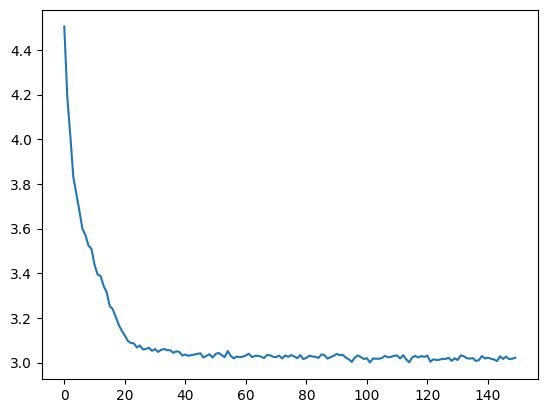

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_records)

In [ ]:
summed_gradients_all = expected_gradients.sum(dim=0)

In [ ]:
summed_gradients_all

tensor([-5.6843e-07, -1.8915e-06,  1.5293e-06, -4.8045e-06,  5.7317e-06,
         8.3788e-07, -5.7821e-06,  2.4532e-06,  5.1329e-06, -3.6987e-06,
        -2.5610e-06,  2.1452e-06,  7.3962e-06,  5.2505e-06,  1.2814e-05,
         0.0000e+00, -1.4377e-06,  9.3042e-08, -1.2173e-06, -1.7643e-05,
        -8.3149e-07,  3.4248e-07, -7.5378e-06, -4.2988e-06,  2.8759e-05,
        -1.6129e-07,  8.9959e-06, -7.5936e-06,  5.6610e-06, -6.2947e-06,
         8.3857e-06,  1.5366e-06,  4.7959e-06, -2.5083e-06,  1.2083e-05,
         4.4473e-06, -7.1584e-06,  1.0607e-05, -9.9451e-07,  3.0525e-06,
        -3.1954e-06, -6.6259e-06,  1.5445e-06,  9.3725e-06,  1.1661e-05,
        -6.0937e-06,  3.6656e-06,  1.4976e-06,  7.1261e-07,  4.5300e-06,
         3.2910e-06,  1.1941e-06,  9.1533e-06,  4.8376e-06,  7.4382e-07,
         5.7812e-05,  3.0755e-06,  3.8110e-06,  1.6327e-05,  7.0255e-06,
         3.9051e-06, -3.7895e-06,  2.5659e-06, -3.9369e-06,  9.9758e-06,
        -2.4955e-06, -9.0730e-07, -1.6042e-07, -2.0

In [ ]:
avg = torch.mean(summed_gradients_all)

/tmp/ipykernel_35/1476953208.py:55: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


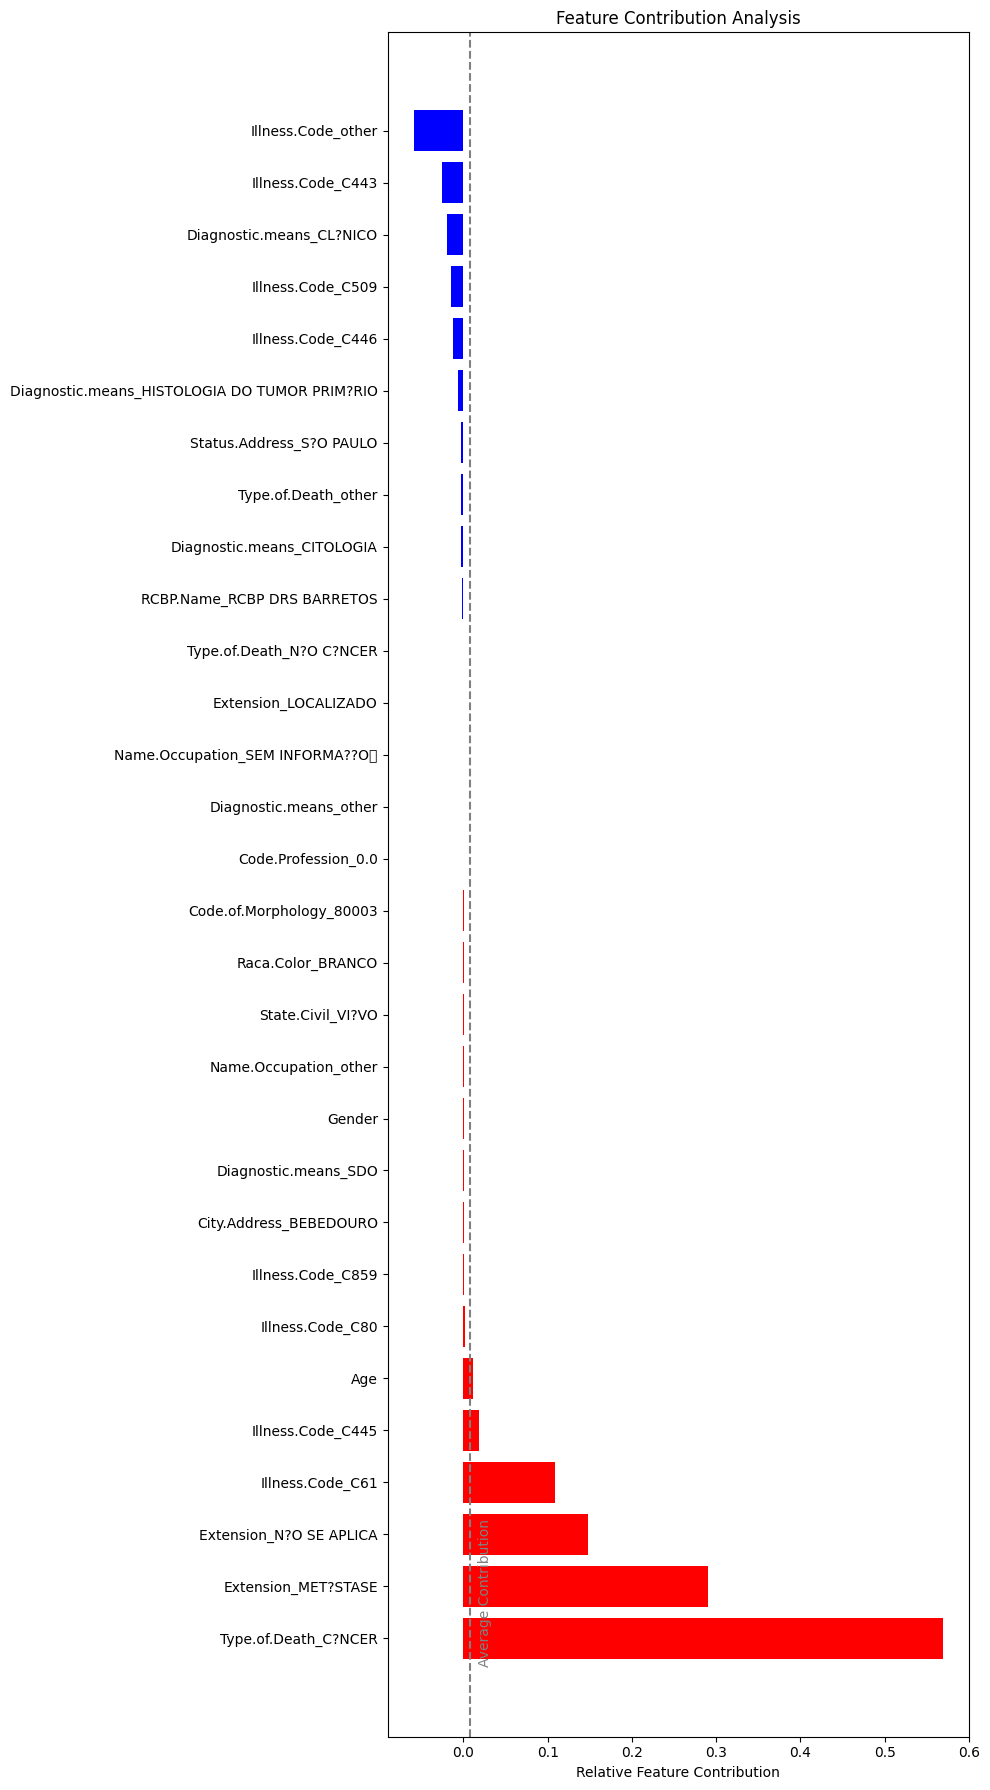

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = X.columns.tolist()
feature_contributions = [ 8.2754e-03,  2.4449e-01, -6.7458e-05,  5.4123e-05,  1.5575e-03,
         3.2035e-04, -3.0248e-02,  3.2682e-03,  2.3505e-04, -2.9171e-03,
         1.6119e-03,  4.8344e-04, -1.7238e-03, -1.1669e-03,  5.9588e-03,
         0.0000e+00, -4.1573e-04, -5.4701e-04, -1.0473e-03, -1.4245e-03,
        -3.0089e-04,  1.1117e-03,  7.6333e-04,  6.3784e-03,  6.1414e-04,
        -3.7345e-03, -1.4455e-03, -3.2355e-04,  3.3533e-04,  4.6745e-04,
        -4.3285e-04,  2.5618e-04,  1.8904e-03,  6.8282e-04, -6.9565e-04,
        -1.4172e-03, -1.2154e-03,  8.1726e-04, -8.3177e-03, -7.5985e-04,
        -1.1202e-03, -5.8048e-04,  1.0369e-03, -2.8469e-04,  6.7106e-03,
         3.5879e-04, -4.2590e-05, -4.9208e-04,  7.3213e-04, -1.1677e-03,
         5.0838e-04,  2.0164e-03, -2.9205e-04, -6.7307e-02,  9.6444e-05,
         2.8948e-03,  1.5678e-02, -9.4986e-04,  9.6401e-06,  2.4515e-03,
         6.6200e-04, -1.4110e-03, -1.7674e-03,  3.8453e-04, -1.9134e-03,
        -5.4385e-04, -4.9116e-04,  6.5076e-04,  3.4984e-04, -9.6108e-04,
         3.6344e-04,  7.8890e-04, -9.3827e-04,  6.7942e-04,  3.8333e-03,
         7.4971e-04, -5.2135e-04,  3.9201e-04, -3.5277e-03, -3.6636e-04,
         4.2249e-04, -1.2218e-03, -1.4330e-03,  2.0466e-03, -3.6416e-03,
         1.8880e-04, -1.4094e-03, -5.4314e-04,  1.6829e-04,  3.3163e-03,
        -1.2260e-04,  1.3083e-03,  2.6524e-03,  9.9954e-04, -3.5142e-03,
         4.8810e-03, -2.5063e-04,  1.2950e-03, -4.9680e-04, -1.6306e-03,
        -1.6315e-03, -1.3667e-03,  2.1176e-03,  6.0328e-04, -1.1989e-03,
         2.3749e-03, -2.0358e-03, -2.0848e-03,  4.5019e-04,  1.1912e-03,
        -1.5323e-03, -7.2216e-04, -4.4424e-04,  1.9066e-03, -3.5590e-03,
         1.5582e-03, -1.6984e-04, -5.5106e-01,  4.0006e-01, -2.6152e-01,
        -3.1872e-01,  2.3336e+00,  5.0189e-02,  1.7094e-02, -1.2590e+00,
        -5.3713e-02, -4.2591e-01, -1.4865e-01, -2.4621e-03,  1.1240e-02,
        -3.8996e-03, -2.6369e-03, -1.6012e-02,  6.2234e+00,  3.1755e+00,
         1.2218e+01, -2.3051e-02, -5.5302e-02]

feature_contributions = feature_contributions / np.sum(feature_contributions)
sorted_indices = np.argsort(feature_contributions)[::-1]
max15_indices = sorted_indices[:15]

min15_indices = sorted_indices[-15:]

selected_indices = np.concatenate([max15_indices, min15_indices])

fig, ax = plt.subplots(figsize=(10, len(selected_indices) * 0.6))
colors = ['red' if val > 0 else 'blue' for val in feature_contributions[selected_indices]]
ax.barh(range(len(selected_indices)), feature_contributions[selected_indices], color=colors)

ax.set_yticks(range(len(selected_indices)))
ax.set_yticklabels(np.array(feature_names)[selected_indices])
ax.set_xlabel("Relative Feature Contribution")

avg_contribution = 1 / len(feature_names)
ax.axvline(avg_contribution, ls='--', color='gray')

ax.text(avg_contribution+0.01, -0.5, 'Average Contribution', color='gray', rotation='vertical')
plt.title("Feature Contribution Analysis")
plt.tight_layout()
plt.show()

## Predictions and Evaluations
- Rewrote the predictions and evaluations

In [ ]:
# Created by Jingyan
model.eval()
test_predictions = []

# Disable gradient calculations
with torch.no_grad():
    for X_test, _, _, _ in test_loader:
        # Forward pass
        X_test = X_test.to(device)
        task_outputs_ = model(X_test)

        # Store the predictions
        test_predictions.append(task_outputs_)

# Process the predictions as needed
# For example, converting them to a list or concatenating
# Here we concatenate the predictions for each task
test_predictions = [torch.cat([preds[i] for preds in test_predictions]) for i in range(len(test_predictions[0]))]



In [ ]:
print(len(test_predictions))
print(test_predictions[0].shape)

7
torch.Size([2048, 1])


In [ ]:
# Created by Jingyan
model.eval()
train_predictions = []

# Disable gradient calculations
with torch.no_grad():
    for X_train, _, _, _ in train_loader:
        # Forward pass
        X_train = X_train.to(device)
        task_outputs_ = model(X_train)

        # Store the predictions
        train_predictions.append(task_outputs_)

# Process the predictions as needed
# For example, converting them to a list or concatenating
# Here we concatenate the predictions for each task
train_predictions = [torch.cat([preds[i] for preds in train_predictions]) for i in range(len(train_predictions[0]))]



In [ ]:
print(len(train_predictions))
print(train_predictions[0].shape)

7
torch.Size([10240, 1])


In [ ]:
# made by Xinyu
def binarize_and_sum_columns(output_list):
    def binarize_list(input_list):
        tensor = torch.Tensor(input_list)
        # print(input_list.max() == input_list.min())
        binary_tensor = (tensor >= 0.5).float()
        return binary_tensor

    result = binarize_list(output_list[0])
    for i in range(1, len(output_list)):
        binary_column = binarize_list(output_list[i])
        print(binary_column.max() == binary_column.min())
        result += binary_column

    return result


In [ ]:
# made by Xinyu
Y_hat_train = binarize_and_sum_columns(train_predictions)
Y_hat_train = Y_hat_train.squeeze()
print(Y_hat_train.shape)

Y_hat_test = binarize_and_sum_columns(test_predictions)
Y_hat_test = Y_hat_test.squeeze()
print(Y_hat_test.shape)

tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
torch.Size([10240])
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
torch.Size([2048])


In [ ]:
# created by Jingyan
# Get the true labels and status
train_trues = []
train_statuses = []
for _, train_targets, train_masks, train_status in train_loader:
    true_label = [train_targets[i]*train_masks[i] for i in range(len(train_targets))]
    train_trues.append(true_label)
    train_statuses.append(train_status)
train_trues = [torch.cat([preds[i] for preds in train_trues]) for i in range(len(train_trues[0]))]
train_statuses = torch.cat([status for status in train_statuses])

print(len(train_trues))
print(train_trues[0].shape)
print(train_statuses.shape)

test_trues = []
test_statuses = []
for _, test_targets, test_masks, test_status in test_loader:
    true_label = [test_targets[i]*test_masks[i] for i in range(len(test_targets))]
    test_trues.append(true_label)
    test_statuses.append(test_status)

test_trues = [torch.cat([preds[i] for preds in test_trues]) for i in range(len(test_trues[0]))]
test_statuses = torch.cat([status for status in test_statuses])

print(len(test_trues))
print(test_trues[0].shape)
print(test_statuses.shape)

7
torch.Size([10240, 1])
torch.Size([10240])
7
torch.Size([2048, 1])
torch.Size([2048])


In [ ]:
# made by Xinyu
Y_true_train = binarize_and_sum_columns(train_trues)
Y_true_train = Y_true_train.squeeze()
print(Y_true_train.shape)

Y_true_test = binarize_and_sum_columns(test_trues)
Y_true_test = Y_true_test.squeeze()
print(Y_true_test.shape)

tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)
torch.Size([10240])
tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)
torch.Size([2048])


In [ ]:
# made by Xinyu
# Modifed by Jingyan: adjusted for cencored data following Dr. Li's code
# https://github.com/yanlirock/Multi-task_Survival_Analysis/blob/6cda8883a240b789ef38be891909a2bae15f4623/functions/getcindex_cox.m#L1

class Cindex(torch.nn.Module):
    def __init__(self):
        super(Cindex, self).__init__()

    def forward(self, y, y_hat, status):
        if not torch.is_tensor(y):
            y = torch.Tensor(y)
        if not torch.is_tensor(y_hat):
            y_hat = torch.Tensor(y_hat)
        if not torch.is_tensor(status):
          status = torch.Tensor(status)

        N = y.size(0)
        total_pairs = 0
        c = 0

        for i in range(N):
            for j in range(i + 1, N):
                a = y[i]
                b = y[j]
                a_hat = y_hat[i]
                b_hat = y_hat[j]
                astatus = status[i]
                bstatus = status[j]
                if (a >= b and a_hat >= b_hat and bstatus == 1) or (a <= b and a_hat <= b_hat and astatus == 1):
                    c += 1
                if (a <= b and astatus==1) or (b <= a and bstatus == 1):
                    total_pairs += 1

        outcome = c / total_pairs
        return outcome

cindex_calculator = Cindex()
c11_train = cindex_calculator(Y_true_train, Y_hat_train, train_statuses)
print(c11_train)
c11_test = cindex_calculator(Y_true_test, Y_hat_test, test_statuses)
print(c11_test)
#According to the way in your paper
# c = 1 / num * Σi=1^num Σj>i [yj > yi * I[S(^yj|Xj) > S(^yi|Xi)]]

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_35/655473365.py", line 38, in <module>
    c11_train = cindex_calculator(Y_true_train, Y_hat_train, train_statuses)
  File "/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1518, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1527, in _call_impl
    return forward_call(*args, **kwargs)
  File "/tmp/ipykernel_35/655473365.py", line -1, in forward
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/opt/conda/lib/

In [ ]:
# 0.7103323579075326
# 0.7193680369479399
# 56mins

In [ ]:
# c11_train = 0.8174466628004992
# c11_test = 0.8137755363531064

I have modified the c-index according to Dr. Li's github code, we might not need the following part. (Jingyan)

In [ ]:
# made by Xinyu
# For this Cindex, it seems that
# it does not take the censored data into account,
# should we adjust for censored data?
class Cindex(torch.nn.Module):
    def __init__(self):
        super(Cindex, self).__init__()

    def forward(self, y, y_hat):
        if not torch.is_tensor(y):
            y = torch.Tensor(y)
        if not torch.is_tensor(y_hat):
            y_hat = torch.Tensor(y_hat)

        N = y.size(0)
        total_pairs = N * (N - 1) / 2
        c = 0

        for i in range(N):
            for j in range(i + 1, N):
                a = y[i]
                b = y[j]
                a_hat = y_hat[i]
                b_hat = y_hat[j]

                if (a >= b and a_hat >= b_hat) or (a <= b and a_hat <= b_hat):
                    c += 1

        outcome = c / total_pairs
        return outcome

cindex_calculator = Cindex()
c11_train = cindex_calculator(Y_true_train, Y_hat_train)
c11_test = cindex_calculator(Y_true_test, Y_hat_test)

#According to the way in your paper
# c = 1 / num * Σi=1^num Σj>i [yj > yi * I[S(^yj|Xj) > S(^yi|Xi)]]

In [ ]:
print(c11_train)
print(c11_test)

In [ ]:
class Cindex(torch.nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, y, y_hat, status):

        status_matrix = status.repeat(status.size(0), 1)
        cmp_mask = (y.repeat(status.size(0), 1) - y) * (status_matrix - status_matrix.t())
        concordant = torch.where(
            (y_hat.repeat(status.size(0), 1) - y_hat) * cmp_mask > 0,
            torch.ones_like(cmp_mask), torch.zeros_like(cmp_mask))

        total_pairs = torch.where(
            cmp_mask !=0,
            torch.ones_like(cmp_mask), torch.zeros_like(cmp_mask))

        return concordant.sum() / total_pairs.sum()

In [ ]:
cindex_calculator = Cindex()
c11_train = cindex_calculator(Y_true_train, Y_hat_train, train_statuses)

In [ ]:
c11_train

In [ ]:
Y_test_train = Y_true_train.cuda(0)
Y_hat_train = Y_hat_train.cuda(0)
train_statuses = train_statuses.cuda(0)